# Лабораторная работа №4
## Линейные модели, SVM и деревья решений
### Импорт библиотек:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

### Загрузка и первичный анализ данных:
В качестве набора данных используется готовый набор данных из лабораторной работы №3 [IEEE-CIS Fraud Detection](https://www.kaggle.com/c/ieee-fraud-detection/) в котором уже произведена обработка пропусков в данных, кодирование категориальных признаков и масштабирование данных.

In [2]:
data = pd.read_csv('D:/Загрузки/IEEE-CIS Fraud Detection/newdone_train.csv', sep=",")
data.drop(['Unnamed: 0'], inplace=True, axis=1)

In [3]:
# Размер набора данных
data.shape

(590540, 321)

In [4]:
# Первые 5 строк датасета
data.head()

,isFraud,TransactionAmt,card1,card2,card3,card5,addr1,C1,C2,C3,...,P_emaildomain_web.de,P_emaildomain_windstream.net,P_emaildomain_yahoo.co.jp,P_emaildomain_yahoo.co.uk,P_emaildomain_yahoo.com,P_emaildomain_yahoo.com.mx,P_emaildomain_yahoo.de,P_emaildomain_yahoo.es,P_emaildomain_yahoo.fr,P_emaildomain_ymail.com
0,0,0.002137,10095,220,42,38,166,0.000213,0.000176,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.000900,1372,303,42,2,173,0.000213,0.000176,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.001840,2833,389,42,58,178,0.000213,0.000176,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.001558,13341,466,42,14,282,0.000427,0.000879,0.0,...,0,0,0,0,1,0,0,0,0,0
4,0,0.001558,2712,413,42,2,241,0.000213,0.000176,0.0,...,0,0,0,0,0,0,0,0,0,0


### Разделение выборки на обучающую и тестовую:
С использованием метода train_test_split.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
data_train, data_test, data_y_train, data_y_test = train_test_split(data[data.columns.drop('isFraud')], data['isFraud'], random_state=1)

### Обучение линейной модели:
Логистическая регрессия с использованием регуляризации L2 (гребневая регрессия или регуляризация Тихонова).

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
lr = LogisticRegression(penalty='l2', max_iter=1000).fit(data_train, data_y_train)
data_test_predicted_lr = lr.predict(data_test)

### Обучение модели SVM:
Классификатор метода опорных векторов с использованием нескольких нелинейных разделяющих поверхностей: полиномиальной (poly), радиальной базисной функции (rbf) и сигмоидальной (sigmoid).

In [9]:
from sklearn.svm import SVC

In [10]:
svc1 = SVC(kernel='poly', max_iter=100, cache_size=2500).fit(data_train, data_y_train)
data_test_predicted_svcp = svc1.predict(data_test)

svc2 = SVC(kernel='rbf', max_iter=100, cache_size=2500).fit(data_train, data_y_train)
data_test_predicted_svcr = svc2.predict(data_test)

svc3 = SVC(kernel='sigmoid', max_iter=100, cache_size=2500).fit(data_train, data_y_train)
data_test_predicted_svcs = svc3.predict(data_test)

(roc_auc_score(data_y_test, data_test_predicted_svcp), roc_auc_score(data_y_test, data_test_predicted_svcr), roc_auc_score(data_y_test, data_test_predicted_svcs))

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


(0.5163227060815412, 0.508056740197351, 0.5087328144716045)

In [11]:
svc = SVC(kernel='poly', max_iter=1000, cache_size=2500).fit(data_train, data_y_train)
data_test_predicted_svc = svc.predict(data_test)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


### Обучение модели дерева решений:
Классификатор дерева решений.

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dtc = DecisionTreeClassifier(random_state=1).fit(data_train, data_y_train)
data_test_predicted_dtc = dtc.predict(data_test)

### Оценка и сравнение качества полученных моделей с помощью двух подходящих для задачи метрик:
Используем метрику ROC AUC (roc_auc_score), т.к. данная метрика используется в leaderboard'е и метрику recall (recall_score), т.к. для данной предметной области намного важнее не распознать мошенническую транзакцию как обычную, чем обычную как мошенническую.

In [14]:
from sklearn.metrics import recall_score

In [15]:
print('Метрика roc_auc_score:')
print('LogisticRegression: ', roc_auc_score(data_y_test, data_test_predicted_lr))
print('SVC: ', roc_auc_score(data_y_test, data_test_predicted_svc))
print('DecisionTreeClassifier: ', roc_auc_score(data_y_test, data_test_predicted_dtc))
print('\nМетрика recall_score:')
print('LogisticRegression: ', recall_score(data_y_test, data_test_predicted_lr))
print('SVC: ', recall_score(data_y_test, data_test_predicted_svc))
print('DecisionTreeClassifier: ', recall_score(data_y_test, data_test_predicted_dtc))

Метрика roc_auc_score:
LogisticRegression:  0.5
SVC:  0.5167691018813196
DecisionTreeClassifier:  0.7859369519605246

Метрика recall_score:
LogisticRegression:  0.0
SVC:  0.8170494355780459
DecisionTreeClassifier:  0.5901128843908136


### Важность признаков в дереве решений:

In [16]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

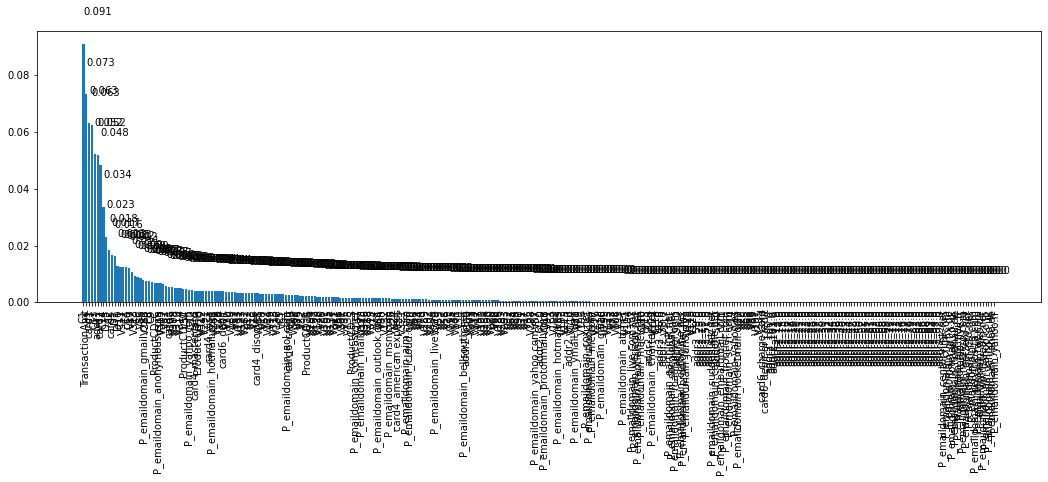

In [17]:
dtc_fl, dtc_fd = draw_feature_importances(dtc, data_train)

In [18]:
# Список признаков, отсортированный на основе важности, и значения важности
dtc_fl, dtc_fd

(['C1',
  'TransactionAmt',
  'card1',
  'C7',
  'C13',
  'addr1',
  'card2',
  'C14',
  'D15',
  'C2',
  'card5',
  'D1',
  'D10',
  'C11',
  'V317',
  'C4',
  'C10',
  'V87',
  'V313',
  'C6',
  'V86',
  'P_emaildomain_gmail.com',
  'V283',
  'C8',
  'C9',
  'ProductCD_C',
  'P_emaildomain_anonymous.com',
  'V315',
  'V307',
  'V62',
  'card3',
  'V306',
  'V308',
  'V310',
  'V314',
  'ProductCD_W',
  'V54',
  'P_emaildomain_yahoo.com',
  'C12',
  'card4_mastercard',
  'ProductCD_H',
  'V320',
  'V312',
  'V291',
  'card4_visa',
  'P_emaildomain_hotmail.com',
  'V281',
  'V128',
  'V78',
  'card6_debit',
  'V77',
  'V20',
  'V130',
  'V53',
  'V83',
  'V131',
  'V127',
  'V282',
  'V12',
  'V13',
  'V76',
  'card4_discover',
  'V285',
  'V18',
  'V67',
  'V124',
  'V99',
  'V318',
  'V133',
  'C5',
  'V61',
  'P_emaildomain_aol.com',
  'card6_credit',
  'V19',
  'V309',
  'V96',
  'V75',
  'V82',
  'ProductCD_R',
  'V126',
  'V294',
  'V102',
  'V129',
  'V136',
  'V26',
  'V301',
 

In [19]:
# Дерево решений только с важными признаками
tree_col = []
for col, val in zip(dtc_fl, dtc_fd):
    if val >= 0.001:
        tree_col.append(col)
        
dtc2 = DecisionTreeClassifier(random_state=1).fit(data_train[tree_col], data_y_train)
data_test_predicted_dtc2 = dtc2.predict(data_test[tree_col])
# Сравнение оценки метрики roc_auc_score для дерева решений со всеми признаками и для дерева решений с важными признаками
(roc_auc_score(data_y_test, data_test_predicted_dtc), roc_auc_score(data_y_test, data_test_predicted_dtc2))

(0.7859369519605246, 0.788086522253391)

### Визуализация дерева решений:

In [20]:
import graphviz
from sklearn.tree import export_graphviz

In [21]:
dot_data = export_graphviz(dtc2, out_file=None, 
                           feature_names=tree_col, 
                           class_names=['Common', 'Fraud'], 
                           filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render('graph.gv', view=False)

'graph.gv.pdf'